# Time series decomposition of the data cube

In [2]:
using CABLAB

In [10]:
c             = Cube("/Net/Groups/BGI/scratch/fgans/cubecopy/datacube/")
vars          = ["Emission","SoilMoisture","t2m"];
cdata         = getCubeData(c,latitude=(30,65), longitude=(-10,35),variable=vars);

We want to decompose the time series into a signals of Trend, Seasonal cycle, low-frequency variations and high-frequency variantions. Here we use a Fourier-based approach by calling **filterTSFFT**. Before doing so, we need to do some gapFilling

In [11]:
cube_filled=mapCube(gapFillMSC,cdata);

In [12]:
xout=mapCube(filterTSFFT,cube_filled);

And we can plot the resulting decomposed time series

In [13]:
plotXY(xout)

Interact.Options{:Dropdown,Int64}(Signal{Int64}(1, nactions=0),"X Axis",1,"time",Interact.OptionDict(Any["time","TimeScaleAxis","longitude","latitude","VariableAxis"],Dict{Any,Any}("latitude"=>4,"VariableAxis"=>5,"time"=>1,"longitude"=>3,"TimeScaleAxis"=>2)),Any[],Any[])

Interact.Options{:Dropdown,Int64}(Signal{Int64}(0, nactions=0),"Group by:",0,"None",Interact.OptionDict(Any["None","time","TimeScaleAxis","longitude","latitude","VariableAxis"],Dict{Any,Any}("None"=>0,"latitude"=>4,"VariableAxis"=>5,"time"=>1,"longitude"=>3,"TimeScaleAxis"=>2)),Any[],Any[])

Interact.Slider{Int64}(Signal{Int64}(253, nactions=0),"Time Step",253,1:506,true)

Interact.Options{:Dropdown,Int64}(Signal{Int64}(1, nactions=0),"TimeScaleAxis",1,"Trend",Interact.OptionDict(Any["Trend","LF-Variability","Seasonal Cycle","Fast Oscillations"],Dict{Any,Any}("LF-Variability"=>2,"Seasonal Cycle"=>3,"Fast Oscillations"=>4,"Trend"=>1)),Any[],Any[])

Interact.Slider{Float64}(Signal{Float64}(12.25, nactions=0),"Longitude",12.25,-10.0:0.25:34.75,true)

Interact.Slider{Float64}(Signal{Float64}(47.5, nactions=0),"Latitude",47.5,30.25:0.25:65.0,true)

Interact.Options{:Dropdown,Int64}(Signal{Int64}(1, nactions=0),"VariableAxis",1,"Emission",Interact.OptionDict(Any["Emission","SoilMoisture","t2m"],Dict{Any,Any}("Emission"=>1,"SoilMoisture"=>2,"t2m"=>3)),Any[],Any[])

In [14]:
variance=mapCube(timeVariance,xout);

Let's look at a map of the variability in the Trend signal to see where trends in air temperature are strongest.

Interact.Options{:ToggleButtons,Int64}(Signal{Int64}(1, nactions=0),"",1,"Trend",Interact.OptionDict(Any["Trend","LF-Variability","Seasonal Cycle","Fast Oscillations"],Dict{Any,Any}("LF-Variability"=>2,"Seasonal Cycle"=>3,"Fast Oscillations"=>4,"Trend"=>1)),Any[],Any[])

Interact.Options{:ToggleButtons,Int64}(Signal{Int64}(1, nactions=0),"",1,"Emission",Interact.OptionDict(Any["Emission","SoilMoisture","t2m"],Dict{Any,Any}("Emission"=>1,"SoilMoisture"=>2,"t2m"=>3)),Any[],Any[])

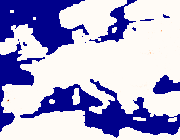

In [15]:
plotMAP(variance)

And plot where the seasonal cycle shows the highest variance

Interact.Options{:ToggleButtons,Int64}(Signal{Int64}(1, nactions=0),"",1,"Trend",Interact.OptionDict(Any["Trend","LF-Variability","Seasonal Cycle","Fast Oscillations"],Dict{Any,Any}("LF-Variability"=>2,"Seasonal Cycle"=>3,"Fast Oscillations"=>4,"Trend"=>1)),Any[],Any[])

Interact.Options{:ToggleButtons,Int64}(Signal{Int64}(1, nactions=0),"",1,"Emission",Interact.OptionDict(Any["Emission","SoilMoisture","t2m"],Dict{Any,Any}("Emission"=>1,"SoilMoisture"=>2,"t2m"=>3)),Any[],Any[])

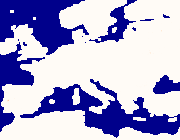

In [23]:
plotMAP(variance,dmax=50.f0)